In [2]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import statistics
import cv2
from google.colab.patches import cv2_imshow 
%cd "/content/drive/My Drive/Colab Notebooks/Assignment_2/src"

/content/drive/My Drive/Colab Notebooks/Assignment_2/src


#**Q1**




In [ ]:
def load_images_from_folder(folder):
    images = []
    ct = 0
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), 0)
        if img is not None:
            images.append(img)
        ct = ct + 1
        if ct == 5:
          break

    return images

images = load_images_from_folder("../images")

##Low Pass Filter

In [ ]:
def AvgFilter(img, k): 
  m, n = img.shape 
  img_new = np.zeros([m, n]) 
  kk = int(k/2)
  for x in range(0, m): 
      for y in range(0, n): 
          for xx in range(-kk, kk+1):
              for yy in range(-kk, kk+1):
                 adjx = x + xx
                 adjy = y + yy
                 if(adjx >= 0  and adjx < m and adjy >= 0 and adjy < n):
                    img_new[x][y] = img_new[x][y] + img[adjx][adjy]

  img_new = img_new / (k*k)
  img_new = img_new.astype(np.uint8) 
  #cv2_imshow(img_new)
  return img_new

##Optimized Low Pass Filter

In [ ]:
def OptAvgFilter(timg, k):
  m, n = timg.shape 

  img = np.zeros([m, n]) 
  img_new = np.zeros([m, n]) 
  kk = int(k/2)
  
  for i in range(0,m):
    for j in range(0,n):
      img[i][j] = timg[i][j]

  for i in range(1, n):
    img[0][i] = img[0][i] + img[0][i-1]
 
  for j in range(1,m):
    img[j][0] =  img[j][0] + img[j-1][0]

  for i in range(1,m):
    for j in range(1,n):
      img[i][j] = img[i][j] + img[i-1][j] + img[i][j-1] - img[i-1][j-1]

  for x in range(1,m):
    for y in range(1,n):
      r1 = max(0 , x - kk)
      c1 = max(0, y - kk)
      r2 = min(m-1, x + kk)
      c2 = min(n-1, y + kk)

      img_new[x][y] = img[r2][c2] - img[r2][c1-1] - img[r1-1][c2] + img[r1-1][c1-1]
      img_new[x][y] = img_new[x][y] / (k*k)

  img_new = img_new.astype(np.uint8) 
  #cv2_imshow(img_new)
  return img_new


##Comparision

1 loop, best of 1: 4.97 s per loop
1 loop, best of 1: 4.92 s per loop
1 loop, best of 1: 4.88 s per loop
1 loop, best of 1: 4.9 s per loop
1 loop, best of 1: 9.87 s per loop
1 loop, best of 1: 25.7 s per loop
1 loop, best of 1: 49.2 s per loop
1 loop, best of 1: 1min 20s per loop


<Figure size 720x360 with 0 Axes>

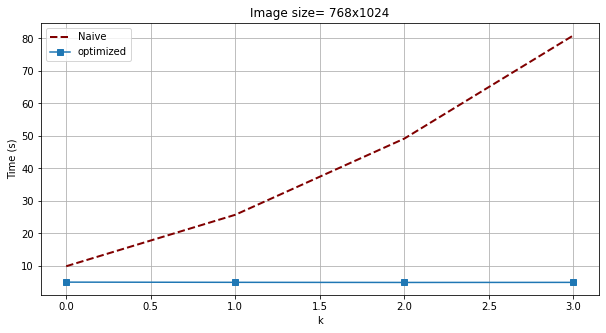

1 loop, best of 1: 690 ms per loop
1 loop, best of 1: 680 ms per loop
1 loop, best of 1: 683 ms per loop
1 loop, best of 1: 670 ms per loop
1 loop, best of 1: 1.41 s per loop
1 loop, best of 1: 3.55 s per loop
1 loop, best of 1: 6.84 s per loop
1 loop, best of 1: 11.3 s per loop


<Figure size 720x360 with 0 Axes>

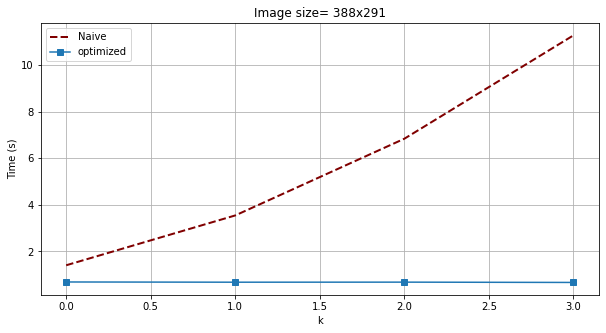

1 loop, best of 1: 4.98 s per loop
1 loop, best of 1: 4.96 s per loop
1 loop, best of 1: 4.99 s per loop
1 loop, best of 1: 5.94 s per loop
1 loop, best of 1: 13.8 s per loop
1 loop, best of 1: 25.2 s per loop
1 loop, best of 1: 48.7 s per loop
1 loop, best of 1: 1min 19s per loop


<Figure size 720x360 with 0 Axes>

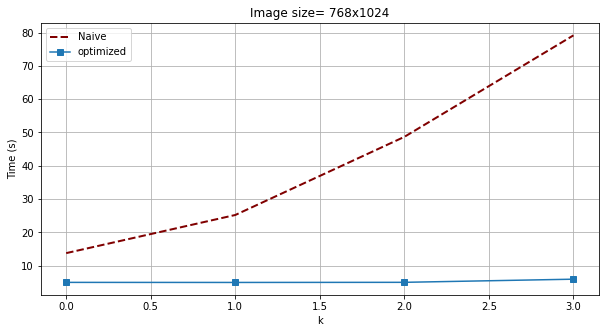

1 loop, best of 1: 1.62 s per loop
1 loop, best of 1: 1.64 s per loop
1 loop, best of 1: 1.6 s per loop
1 loop, best of 1: 1.64 s per loop
1 loop, best of 1: 3.31 s per loop
1 loop, best of 1: 8.48 s per loop
1 loop, best of 1: 16 s per loop
1 loop, best of 1: 26.5 s per loop


<Figure size 720x360 with 0 Axes>

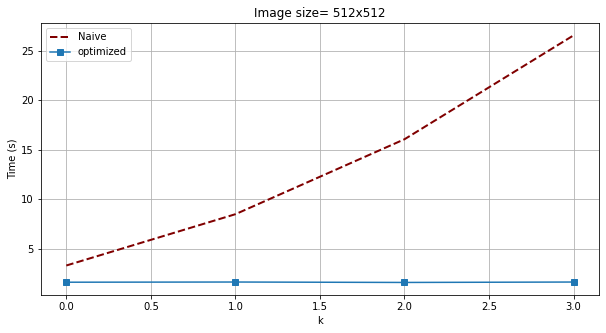

In [ ]:
K=np.array([3,5,7,9])

for i in range(4):
    plt.figure(figsize=(10,5))
    img = images[i]
    
    val1=[]
    for k in K:
        p2=%timeit -o -r1 -n1 OptAvgFilter(img,k)
        val1.append(sum(p2.all_runs)/len(p2.all_runs))
    
    val2=[]
    time_naive=[]
    for k in K:
        p1=%timeit -o -r1 -n1 AvgFilter(img,k)
        val2.append(sum(p1.all_runs)/len(p1.all_runs))
    
    plt.figure(figsize=(10,5))
    plt.plot(val2,label="Naive",  c='maroon', ls=('dashed'), lw=2)
    plt.plot(val1,'-s',label="optimized")
    #plt.xticks(np.arange(5),K)
    plt.ylabel("Time (s)")
    plt.xlabel("k")
    plt.grid(True)
    plt.legend()
    plt.title("Image size= {}x{}".format(images[i].shape[0],images[i].shape[1]))
    plt.show()

##Median Filter

In [ ]:
def MedianFilter(img, k): 
  m, n = img.shape 
  img_new = np.zeros([m, n]) 
  kk = int(k/2)
  for x in range(0, m): 
      for y in range(0, n): 
          temp = []
          for xx in range(-kk, kk+1):
              for yy in range(-kk, kk+1):
                 adjx = x + xx
                 adjy = y + yy
                 if(adjx >= 0  and adjx < m and adjy >= 0 and adjy < n):
                    temp.append(img[adjx][adjy])
  
          img_new[x][y] = statistics.median(temp)

  img_new = img_new.astype(np.uint8) 
  #cv2_imshow(img_new)
  return img_new


##Remove noise from
Noisy.jpg

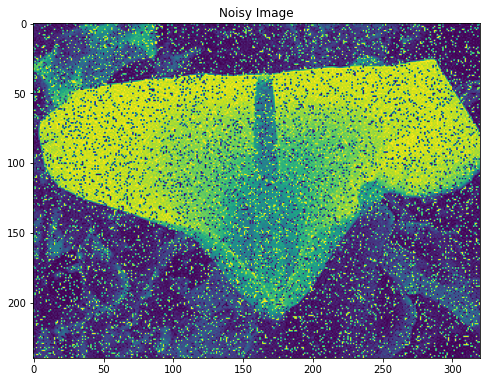

/usr/lib/python3.6/statistics.py:385: RuntimeWarning: overflow encountered in ubyte_scalars
  return (data[i - 1] + data[i])/2


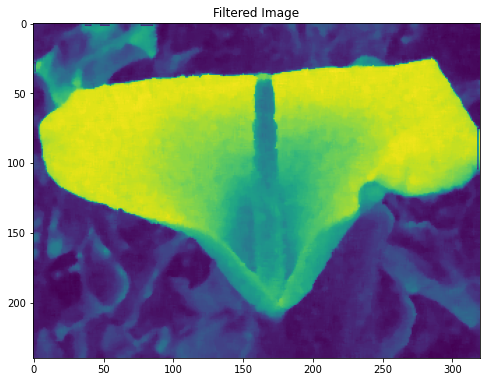

In [ ]:
noisy_img=cv2.imread('../images/Noisy.jpg',0)

plt.figure(figsize=(8,8))
plt.imshow(noisy_img)
plt.title("Noisy Image")
plt.show()

filtered_img=MedianFilter(noisy_img,5)
plt.figure(figsize=(8,8))
plt.imshow(filtered_img)
plt.title("Filtered Image")
plt.show()

#Q2

##Canny Edge Detection 


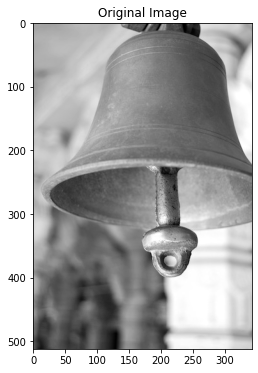

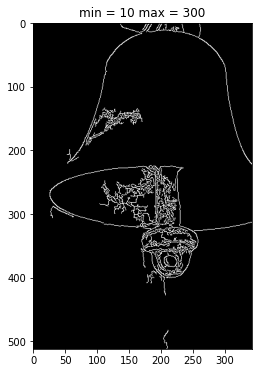

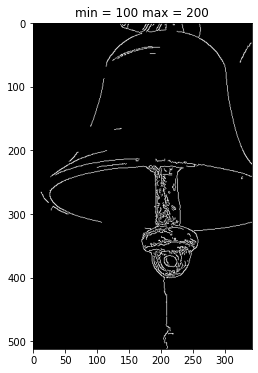

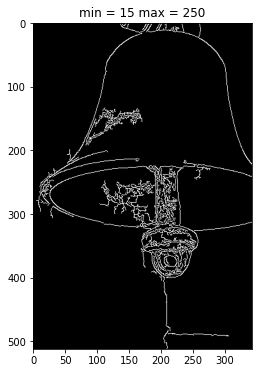

In [ ]:
image = cv2.imread("../images/bell.jpg",0)
plt.figure(figsize=(6,6))
plt.imshow(image,cmap="gray")
plt.title("Original Image")
plt.show()

edgeimage = cv2.Canny(image, 10, 300)
plt.figure(figsize=(6,6))
plt.imshow(edgeimage,cmap="gray")
plt.title("min = 10 max = 300")
plt.show()


edgeimage = cv2.Canny(image, 100, 200)
plt.figure(figsize=(6,6))
plt.imshow(edgeimage,cmap="gray")
plt.title("min = 100 max = 200")
plt.show()

edgeimage = cv2.Canny(image, 15, 250)
plt.figure(figsize=(6,6))
plt.imshow(edgeimage,cmap="gray")
plt.title("min = 15 max = 250")
plt.show()


Best value min = 15 max = 250

##Fitler

In [ ]:
def Filter(img, k, filter): 
  m, n = img.shape 
  img_new = np.zeros([m, n]) 
  kk = int(k/2)
  for x in range(0, m): 
      for y in range(0, n): 
          for xx in range(-kk, kk+1):
              for yy in range(-kk, kk+1):
                 adjx = x + xx
                 adjy = y + yy
                 
                 if(adjx >= 0  and adjx < m and adjy >= 0 and adjy < n):
                    img_new[x][y] = img_new[x][y] + (img[adjx][adjy]*filter[xx+1][yy+1])

  #img_new = img_new.astype(np.uint8) 
  #cv2_imshow(img_new)
  return img_new

##Prewitt Filter

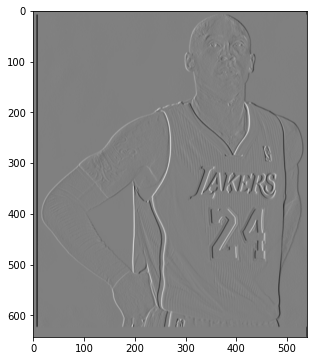

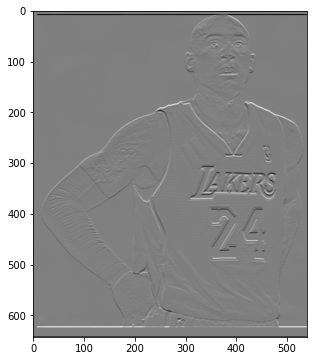

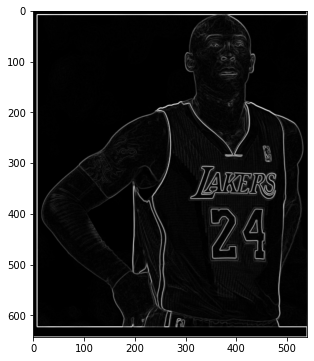

In [ ]:
img = cv2.imread("../images/kobe.png", 1)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
fximg = Filter(img, 3, filter)
plt.figure(figsize=(6,6))
plt.imshow(fximg, cmap="gray")


filter = [[-1,-1,-1],[0,0,0],[1,1,1]]
plt.figure(figsize=(6,6))
fyimg = Filter(img, 3, filter)
plt.imshow(fyimg, cmap="gray")

gmagnitude = np.sqrt(np.square(fximg) + np.square(fyimg)) 
gmagnitude *= 255.0 / gmagnitude.max()
plt.figure(figsize=(6,6))
plt.imshow(gmagnitude, cmap="gray")

##Sobel Filter

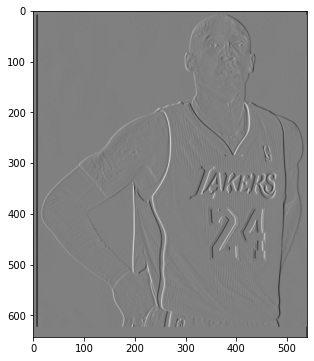

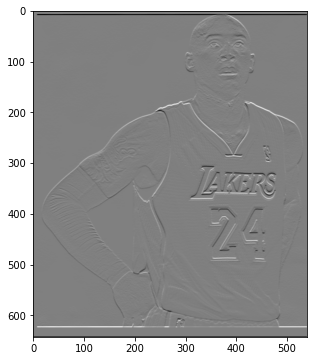

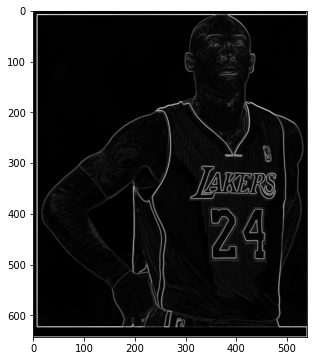

In [ ]:
filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
fximg = Filter(img, 3, filter)
plt.figure(figsize=(6,6))
plt.imshow(fximg, cmap="gray")


filter = [[-1,-2,-1],[0,0,0],[1,2,1]]
plt.figure(figsize=(6,6))
fyimg = Filter(img, 3, filter)
plt.imshow(fyimg, cmap="gray")

gmagnitude = np.sqrt(np.square(fximg) + np.square(fyimg)) 
gmagnitude *= 255.0 / gmagnitude.max()
plt.figure(figsize=(6,6))
plt.imshow(gmagnitude, cmap="gray")

##Roberts Filter

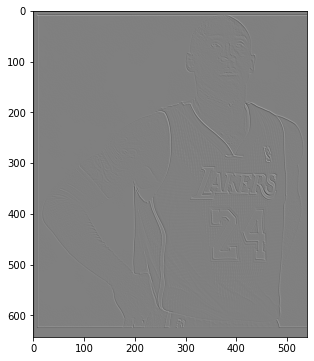

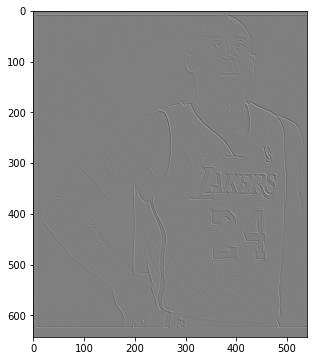

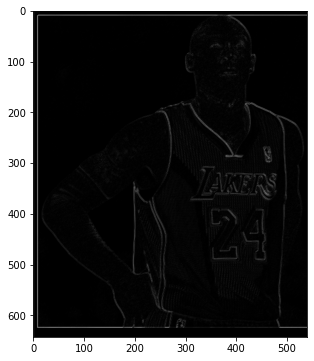

In [ ]:
filter = np.array([[0,1,0],[-1,0,0],[0,0,0]])
fx = Filter(img, 3, filter)
plt.figure(figsize=(6,6))
plt.imshow(fx, cmap="gray")
filter = np.array([[0,-1,0],[1,0,0],[0,0,0]])
fy = Filter(img, 3, filter)
plt.figure(figsize=(6,6))
plt.imshow(fy, cmap="gray")

gmagnitude = np.sqrt(np.square(fx) + np.square(fy)) 
gmagnitude *= 255.0 / gmagnitude.max()
plt.figure(figsize=(6,6))
plt.imshow(gmagnitude, cmap="gray")

##Laplacian Filter

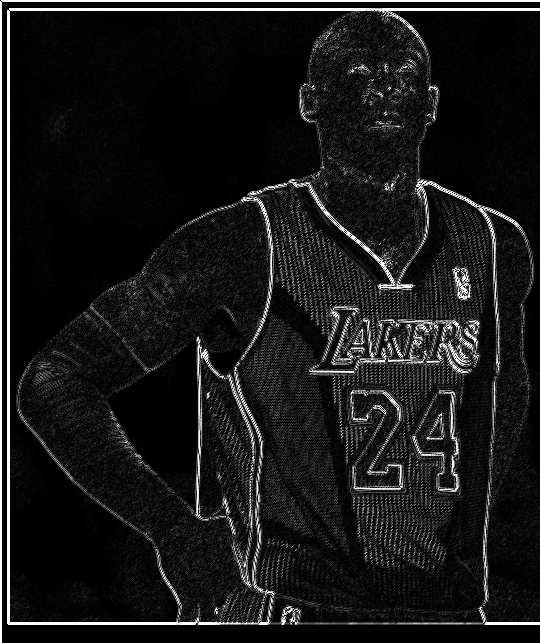

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

In [ ]:
filter = np.array([[0,1,0],[1,-4,1],[0,1,0]])
fx = Filter(img, 3, filter)


filter = np.array([[0,1,0],[1,-4,1],[0,1,0]])
fy = Filter(img, 3, filter)


gmagnitude = np.sqrt(np.square(fx) + np.square(fy)) 
plt.figure(figsize=(6,6))
cv2_imshow(gmagnitude)

##Prewitt 5 X 5

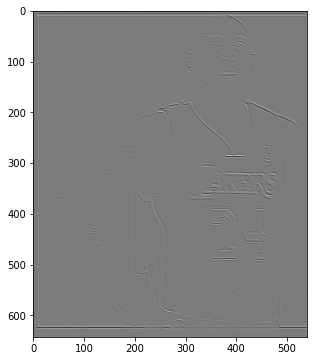

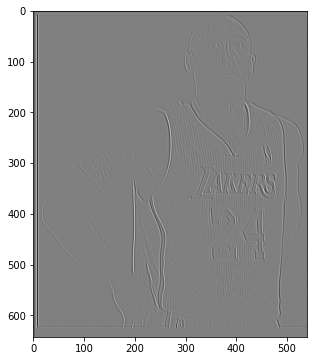

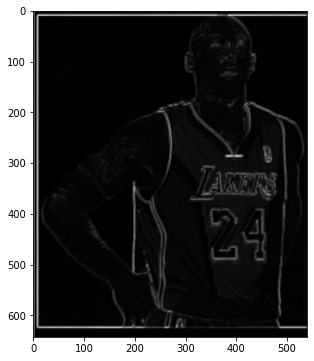

In [ ]:
filter = np.array([[9,9,9,9,9],[9,5,5,5,9],[-7,-3,0,-3,-7],[-7,-3,-3,-3,-7],[-7,-7,-7,-7,-7]])
fx = Filter(img, 5, filter)
plt.figure(figsize=(6,6))
plt.imshow(fx, cmap="gray")

filter = np.array([[9,9,-7,-7,-7],[9,5,-3,-3,-7],[9,5,0,-3,-7],[9,5,-3,-3,-7],[9,9,-7,-7,-7]])
fy = Filter(img, 5, filter)
plt.figure(figsize=(6,6))
plt.imshow(fy, cmap="gray")

gmagnitude = np.sqrt(np.square(fx) + np.square(fy)) 
gmagnitude *= 255.0 / gmagnitude.max()
plt.figure(figsize=(6,6))
plt.imshow(gmagnitude, cmap="gray")

##Sobel 5 X 5

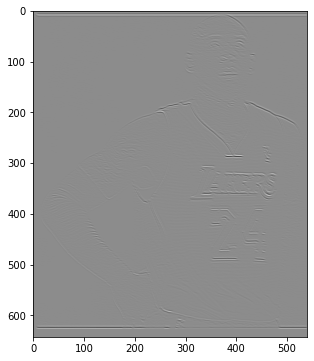

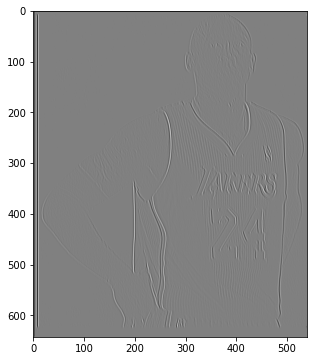

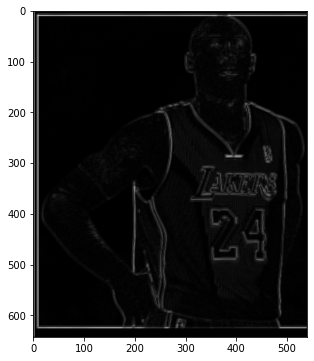

In [ ]:
filter = np.array([[2,2,4,2,2],[1,1,2,1,1],[0,0,0,0,0],[-1,-1,-2,-1,-1],[-2,-2,-4,-2,-2]])
fx = Filter(img, 5, filter)
plt.figure(figsize=(6,6))
plt.imshow(fx, cmap="gray")

filter = filter.T
fy = Filter(img, 5, filter)
plt.figure(figsize=(6,6))
plt.imshow(fy, cmap="gray")

gmagnitude = np.sqrt(np.square(fx) + np.square(fy)) 
gmagnitude *= 255.0 / gmagnitude.max()
plt.figure(figsize=(6,6))
plt.imshow(gmagnitude, cmap="gray")

##Canny


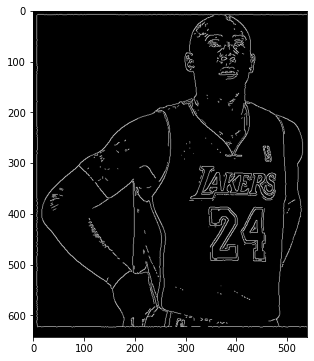

In [ ]:
img = cv2.imread("../images/kobe.png", 1)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
eimg = cv2.Canny(img,140,180)
plt.figure(figsize=(6,6))
plt.imshow(eimg, cmap="gray")

##Add Noise and Fitler

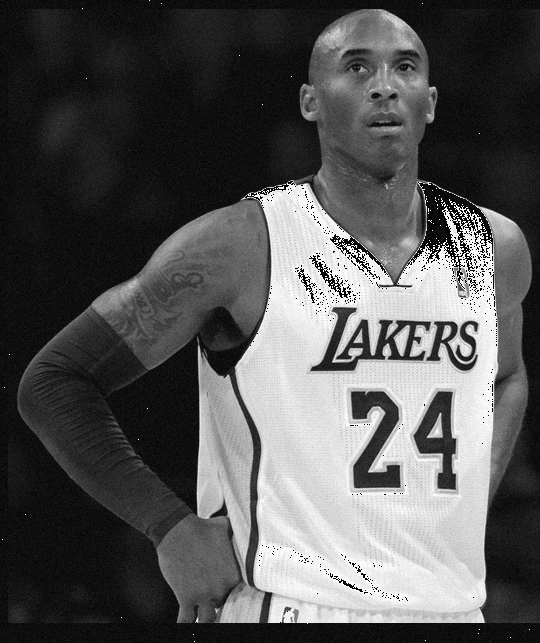

In [ ]:
img = cv2.imread("../images/kobe.png", 1)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
noise=np.random.normal(15,20**0.5,img.shape).reshape(img.shape[0],img.shape[1])
img=(img+noise).astype(np.uint8)
cv2_imshow(img)

###Prewit

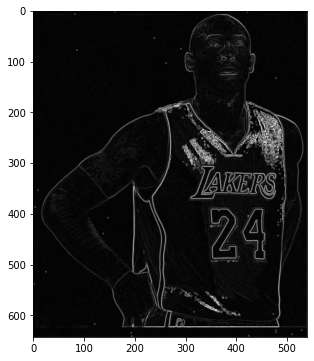

In [ ]:
dictionay = {}
filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
fximg = Filter(img, 3, filter)

filter = [[-1,-1,-1],[0,0,0],[1,1,1]]
fyimg = Filter(img, 3, filter)

gmagnitude = np.sqrt(np.square(fximg) + np.square(fyimg)) 
gmagnitude *= 255.0 / gmagnitude.max()
plt.figure(figsize=(6,6))
plt.imshow(gmagnitude, cmap="gray")

###Sobet

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

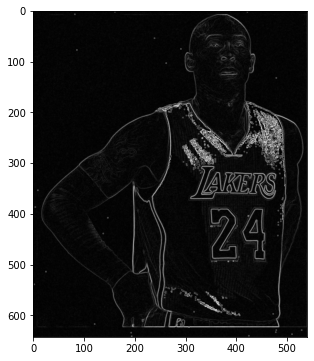

In [ ]:
filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
fximg = Filter(img, 3, filter)
plt.figure(figsize=(6,6))


filter = [[-1,-2,-1],[0,0,0],[1,2,1]]
plt.figure(figsize=(6,6))
fyimg = Filter(img, 3, filter)


gmagnitude = np.sqrt(np.square(fximg) + np.square(fyimg)) 
gmagnitude *= 255.0 / gmagnitude.max()
plt.figure(figsize=(6,6))
plt.imshow(gmagnitude, cmap="gray")

###Robert

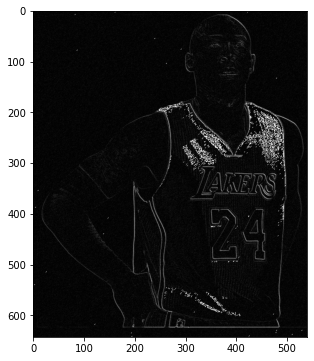

In [ ]:
filter = np.array([[0,1,0],[-1,0,0],[0,0,0]])
fx = Filter(img, 3, filter)

filter = np.array([[0,-1,0],[1,0,0],[0,0,0]])
fy = Filter(img, 3, filter)


gmagnitude = np.sqrt(np.square(fx) + np.square(fy)) 
gmagnitude *= 255.0 / gmagnitude.max()
plt.figure(figsize=(6,6))
plt.imshow(gmagnitude, cmap="gray")

###Laplacian

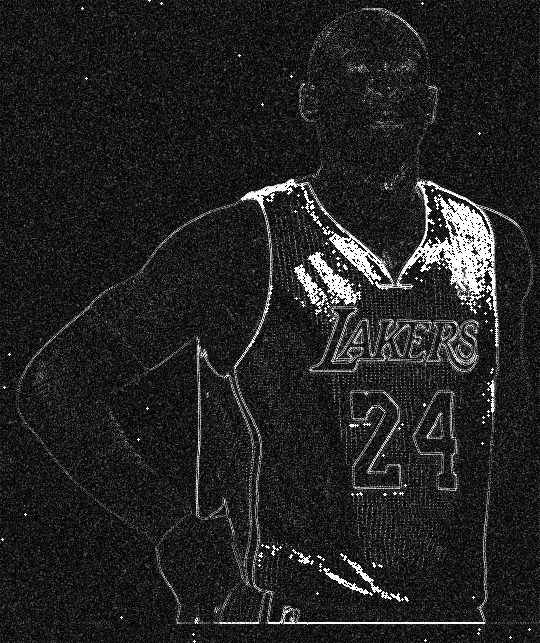

<Figure size 432x432 with 0 Axes>

In [ ]:
filter = np.array([[0,1,0],[1,-4,1],[0,1,0]])
fx = Filter(img, 3, filter)


filter = np.array([[0,1,0],[1,-4,1],[0,1,0]])
fy = Filter(img, 3, filter)


gmagnitude = np.sqrt(np.square(fx) + np.square(fy)) 
plt.figure(figsize=(6,6))
cv2_imshow(gmagnitude)

###Prewit 5 * 5

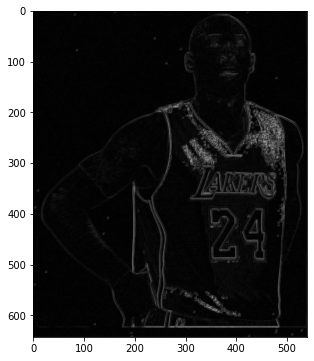

In [ ]:
filter = np.array([[9,9,9,9,9],[9,5,5,5,9],[-7,-3,0,-3,-7],[-7,-3,-3,-3,-7],[-7,-7,-7,-7,-7]])
fx = Filter(img, 5, filter)

filter = np.array([[9,9,-7,-7,-7],[9,5,-3,-3,-7],[9,5,0,-3,-7],[9,5,-3,-3,-7],[9,9,-7,-7,-7]])
fy = Filter(img, 5, filter)


gmagnitude = np.sqrt(np.square(fx) + np.square(fy)) 
gmagnitude *= 255.0 / gmagnitude.max()
plt.figure(figsize=(6,6))
plt.imshow(gmagnitude, cmap="gray")

###Sobel 5 * 5

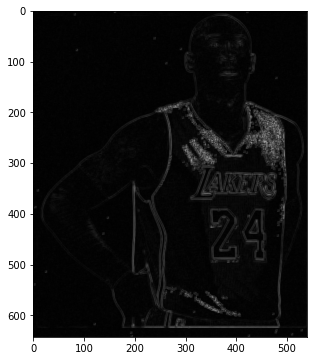

In [ ]:
filter = np.array([[2,2,4,2,2],[1,1,2,1,1],[0,0,0,0,0],[-1,-1,-2,-1,-1],[-2,-2,-4,-2,-2]])
fx = Filter(img, 5, filter)


filter = filter.T
fy = Filter(img, 5, filter)


gmagnitude = np.sqrt(np.square(fx) + np.square(fy)) 
gmagnitude *= 255.0 / gmagnitude.max()
plt.figure(figsize=(6,6))
plt.imshow(gmagnitude, cmap="gray")

---
---

#Q3

##Bilateral Filter

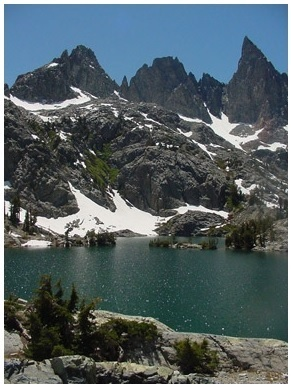

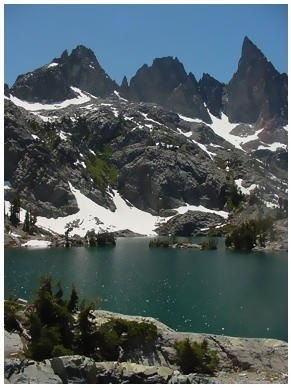

In [73]:
def gaussian(x,sigma):
    return (1.0*(np.exp(-(x**2)/(2*(sigma**2)))))/(1.0*(2*np.pi*(sigma**2)))

def distance(x1,y1,x2,y2):    
    return np.sqrt(np.abs(((x2-x1)**2)-((y2-y1)**2)))

def valid(x, y, n, m):
    if(x > 0 and x < n and y > 0 and y < m):
      return True
    else:
      return False

def applyfilter(image,D, sigma1,sigma2):
  
    n = image.shape[0]
    m = image.shape[1]
    fimg = np.zeros((n,m),dtype=np.float)
   
    for i in range(0,n):
        for j in range(0,m):
            temp2 = 0
            temp1 = 0
            r = -int(D/2)
            r = int(D/2)
            for xx in range(-r, r+1):
                for yy in range(-r, r+1):
                    adjx = i + xx
                    adjy = j + yy
                    if valid(adjx, adjy, n, m):
                      a = gaussian(image[adjx][adjy]*1.0 - image[i][j]*1.0, sigma1)
                      b = gaussian(distance(adjx, adjy, i, j), sigma2)
                      temp1+=(image[adjx][adjy] * a * b)
                      temp2+=(a*b)
            fimg[i][j] = int(temp1 // temp2)
    return fimg.astype(np.uint8)

def bilateralfilter(img,D,sig1,sig2):
    opimage=np.zeros(img.shape,dtype=np.uint8)

    opimage[:,:,0]=applyfilter(img[:,:,0],D,sig1,sig2)
    opimage[:,:,1]=applyfilter(img[:,:,1],D,sig1,sig2)
    opimage[:,:,2]=applyfilter(img[:,:,2],D,sig1,sig2)

    return opimage

img = cv2.imread("../images/mountain.jpg")
# img = cv2.resize(img, (128,128))
image_new = bilateralfilter(img,6,10.0,5.0)

cv2_imshow(img)
cv2_imshow(image_new)

---
---

#Q4


##Mean blur

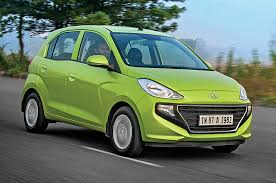

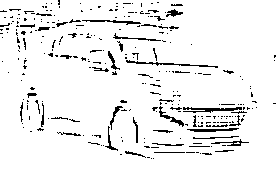

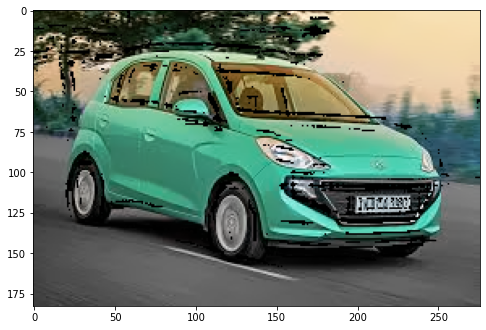

In [ ]:
img = cv2.imread('../images/car.jpeg')
grayimg = cv2.imread('../images/car.jpeg', 0)
filtered_img = bilateralfilter(img,15,10,10)

cv2_imshow(img)
blur= cv2.blur(grayimg,(10,10))
img_edge = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 4)
img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
cv2_imshow(img_edge)

img_cartoon = cv2.bitwise_and(filtered_img, img_edge)
plt.figure(figsize=(8,8))
plt.imshow(img_cartoon)


##Medium Blur

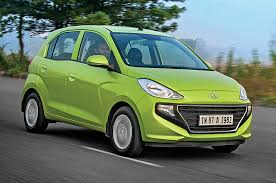

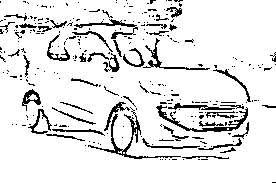

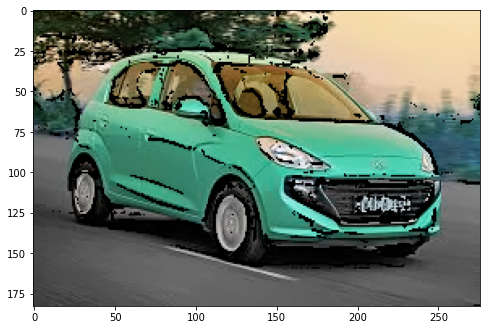

In [ ]:
img = cv2.imread('../images/car.jpeg')
grayimg = cv2.imread('../images/car.jpeg', 0)
filtered_img = bilateralfilter(img,15,10,10)
cv2_imshow(img)
blur=cv2.medianBlur(grayimg,11)
img_edge = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 4)
img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
cv2_imshow(img_edge)

img_cartoon = cv2.bitwise_and(filtered_img, img_edge)
plt.figure(figsize=(8,8))
plt.imshow(img_cartoon)

##Gausian Blur

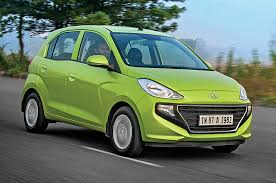

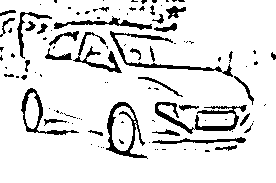

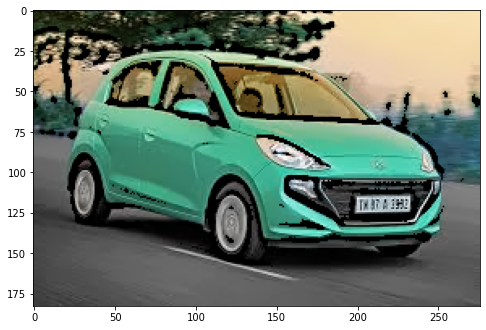

In [ ]:
img = cv2.imread('../images/car.jpeg')
grayimg = cv2.imread('../images/car.jpeg', 0)
filtered_img = bilateralfilter(img,15,10,10)
cv2_imshow(img)
blur=cv2.GaussianBlur(grayimg,(11,11),0)
img_edge = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 4)
img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
cv2_imshow(img_edge)

img_cartoon = cv2.bitwise_and(filtered_img, img_edge)
plt.figure(figsize=(8,8))
plt.imshow(img_cartoon)

---
---

#**Q5**

##DFT

In [ ]:
def DFT(img):
  N, M = img.shape
  dft_img = np.zeros((M,N),dtype=np.complex)

  for x in range(0,M):
    for y in range(0,N):
      dft_img[x][y] = 0.00
      for m in range(0, M): 
        for n in range(0, N):
            dft_img[x][y] += (np.exp(-1j*2*np.pi*((m*x/M) + (n*y/N)))*img[m][n])

  return dft_img


##FFT 1 D

In [75]:
def DFT_slow(x):
    x = np.asarray(x, dtype=np.complex)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)
    
def FFT1D(x):
    x = np.asarray(x, dtype=np.complex)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  
        return DFT_slow(x)
    else:
        X_even = FFT1D(x[::2])
        X_odd = FFT1D(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:int(N / 2)] * X_odd,
                               X_even + factor[int(N / 2):] * X_odd])
x = np.random.random(1024)
np.allclose(FFT1D(x), np.fft.fft(x))

True

##FFT 2 D

In [ ]:
def FFT2D(img):
    n,m=img.shape
    fft=np.zeros((n,m),dtype=np.complex)

    for i in range(n):
        fft[i,:] = FFT1D(img[i,:])

    for j in range(m):
        fft[:, j] = FFT1D(fft[:, j])
    
    return fft

x = cv2.imread('../images/bell.jpg',0)
x = cv2.resize(x, (256,256))


##Comparision of DFT and FFT

1 loop, best of 2: 237 µs per loop
1 loop, best of 2: 1.59 ms per loop
1 loop, best of 2: 5.02 ms per loop
1 loop, best of 2: 767 µs per loop
1 loop, best of 2: 11.7 ms per loop
1 loop, best of 2: 175 ms per loop
[0.0007892869998613605, 0.011894575500264182, 0.17944841000007727]


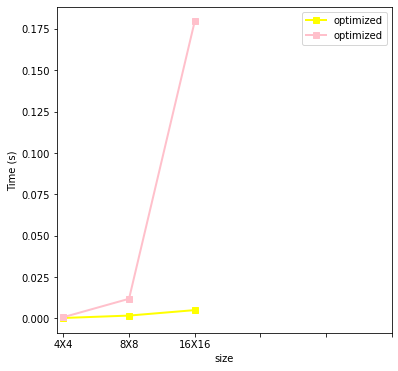

In [ ]:
img1=cv2.imread('../images/bell.jpg',0)
img1=cv2.resize(img1, (4,4))

img2=cv2.imread('../images/chess.jpg',0)
img2=cv2.resize(img2, (8,8))

img3=cv2.imread('../images/chess.jpg',0)
img3=cv2.resize(img3, (16,16))

images = [img1, img2, img3]
fft_time = []
for img in images:
    p1=%timeit -o -r2 -n1 FFT2D(img)
    fft_time.append(sum(p1.all_runs)/len(p1.all_runs))

dft_time = []

for img in images:
    p1=%timeit -o -r2 -n1 DFT(img)
    dft_time.append(sum(p1.all_runs)/len(p1.all_runs))

print(dft_time)
plt.figure(figsize=(6,6))
plt.plot(fft_time,'-s',label="optimized", c='yellow', lw = 2)
plt.plot(dft_time,'-s',label="optimized", c='pink', lw = 2)
plt.ylabel("Time (s)")
plt.xlabel("size")
plt.legend()
plt.xticks(np.arange(6),["4X4", "8X8", "16X16"])
plt.show()

1 loop, best of 2: 3.82 ms per loop
1 loop, best of 2: 16.3 ms per loop
1 loop, best of 2: 65 ms per loop
1 loop, best of 2: 168 ms per loop
1 loop, best of 2: 2.65 s per loop
1 loop, best of 2: 41.7 s per loop
[0.17009291349950217, 2.6795573945000797, 41.8777955810001]


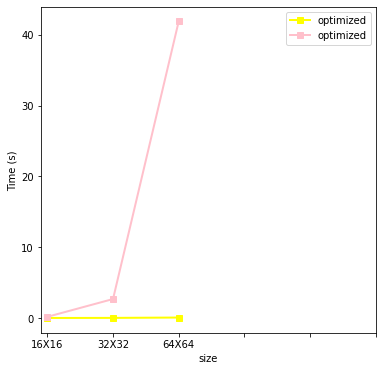

In [ ]:
img1=cv2.imread('../images/bell.jpg',0)
img1=cv2.resize(img1, (16,16))

img2=cv2.imread('../images/mountain.jpg',0)
img2=cv2.resize(img2, (32,32))

img3=cv2.imread('../images/lenna.jpeg',0)
img3=cv2.resize(img3, (64,64))

images = [img1, img2, img3]
fft_time = []
for img in images:
    p1=%timeit -o -r2 -n1 FFT2D(img)
    fft_time.append(sum(p1.all_runs)/len(p1.all_runs))

dft_time = []

for img in images:
    p1=%timeit -o -r2 -n1 DFT(img)
    dft_time.append(sum(p1.all_runs)/len(p1.all_runs))

print(dft_time)
plt.figure(figsize=(6,6))
plt.plot(fft_time,'-s',label="optimized", c='yellow', lw = 2)
plt.plot(dft_time,'-s',label="optimized", c='pink', lw = 2)
plt.ylabel("Time (s)")
plt.xlabel("size")
plt.legend()
plt.xticks(np.arange(6),["16X16", "32X32", "64X64"])
plt.show()

##Inverse FFT

Original image


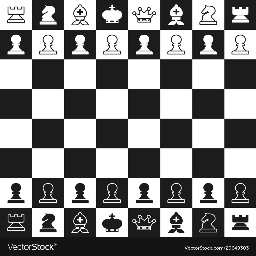

Fourier Transform


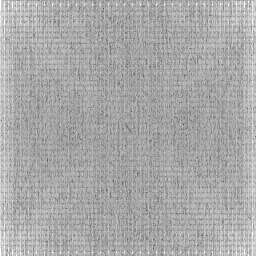

Inverse Fourier Transform


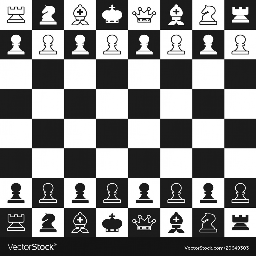

In [ ]:
def IFFT1D(data):
    return (np.conj(FFT1D(np.conj(data)))/data.size).real

def IFFT2D(data):
    image = np.zeros(data.shape,dtype=np.complex)
    n,m=data.shape
    for i in range(n):
        x = data[i,:]
        image[i,:] = np.conj(FFT1D(np.conj(x)))/x.size

    for j in range(m):
        x = image[:,j]
        image[:, j] = np.conj(FFT1D(np.conj(x)))/x.size

    return image.real

img=cv2.imread('../images/chess.jpg',0)
img = cv2.resize(img, (256,256))
fft = FFT2D(img)
ifft = IFFT2D(fft)
y=np.absolute(ifft).astype(np.uint8)
x=20*np.log(np.abs(fft))
print("Original image")
cv2_imshow(img)
print("Fourier Transform")
cv2_imshow(x)
print("Inverse Fourier Transform")
cv2_imshow(y)


##FFT OF FFT

ORIGINAL IMAGE


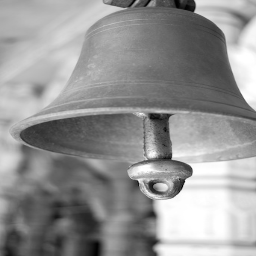

FFT OF FFT OF IMAGE


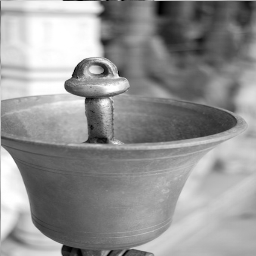

In [ ]:
img=cv2.imread('../images/bell.jpg',0)
img = cv2.resize(img, (256,256))
print("ORIGINAL IMAGE")
cv2_imshow(img)
x=pow(img.shape[0]*img.shape[1],0.5)
double_fft=(FFT2D(FFT2D(img)/x))/x
image=np.absolute(double_fft).astype(np.uint8)
print("FFT OF FFT OF IMAGE")
cv2_imshow(image)

We are getting rotated flip image. Because double fft generates time reversal signal. To fix it we can reverse the signal in frequency domain.

FFT OF FFT OF IMAGE


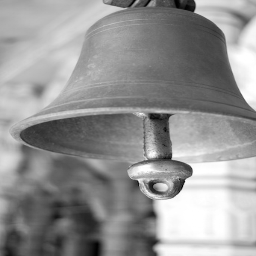

In [ ]:
y = np.conj(FFT2D(img/x))
double_fft=(FFT2D(y))/x
image=np.absolute(double_fft).astype(np.uint8)
print("FFT OF FFT OF IMAGE")
cv2_imshow(image)

#Q6

In [101]:
def convolution(img, k):
  padsize = 2
  padimg = np.zeros((img.shape[0]+255, img.shape[1] + 255))
  padimg[255:,255:] = img
  print(padimg.shape)

  m, n = padimg.shape 
  img_new = np.zeros([m, n]) 
  kk = int(k.shape[0]/2)
  for x in range(0, m): 
      for y in range(0, n): 
          for xx in range(-kk, kk+1):
              for yy in range(-kk, kk+1):
                 adjx = x + xx
                 adjy = y + yy
                 if (adjx >= 0  and adjx < m and adjy >= 0 and adjy < n):
                    img_new[x][y] = img_new[x][y] + (padimg[adjx][adjy]) * img[adjx+kk-1][adjy+kk-1])

  return img_new


f = cv2.imread('../images/bell.jpg', 0)
f = cv2.resize(f, (256,256))
h = cv2.imread('../images/lenna.jpeg',0)
h = cv2.resize(h, (256,256))

fft_f = FFT2D(f)
h = FFT2D(h)

ift_fh = IFFT2D(np.multiply(f,h))
conv = convolution(f,h)




---
---
#Q7

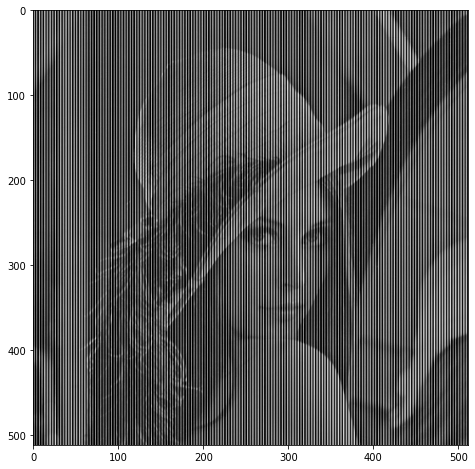

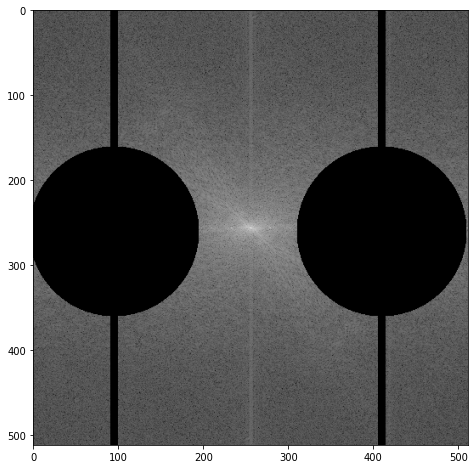

In [ ]:
import warnings
warnings.filterwarnings('error')
import math
img = cv2.imread('../images/noisy_lena.png' ,0)
plt.figure(figsize=(8,8))
plt.imshow(img, cmap = 'gray')
fft = FFT2D(img)
x = np.fft.fftshift(fft)

def distance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

n,m = img.shape
for i in range(n):
  for j in range(m):
      if (j > 90 and j < 100) or (j > 405 and j < 415) or  distance((i,j),(260,95)) <  100 or distance((i,j), (260,410)) < 100:
          x[i][j] = 1

y = np.log(1 + np.abs(x))

plt.figure(figsize=(8,8))
plt.imshow(y ,cmap='gray')



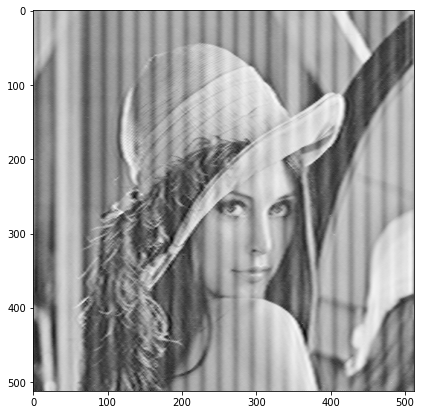

In [ ]:
ifft = IFFT2D(np.fft.ifftshift(x))
z = np.log(np.abs(ifft))

plt.figure(figsize=(7,7))
plt.imshow(z ,cmap='gray')
